In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

In [2]:
placebo = pd.read_csv('Group level/Placebo.csv')
alcohol = pd.read_csv('Group level/Alcohol.csv')

In [3]:
def round_list(list, decimal): #Decimal = how many decimals included
    new_list = []
    for number in list:
        new_list.append(round(number, decimal))
    return new_list

In [4]:
# Fix types and change None to max RT [ms]
alcohol['RT'] = alcohol['RT'].replace('None',2000).astype(int)
placebo['RT'] = placebo['RT'].replace('None',2000).astype(int)

alcohol = alcohol.astype({'trialtype':'string'})
placebo = placebo.astype({'trialtype':'string'})

In [5]:
#Find congurent/incongurent responses
p_RT = placebo.groupby('trialtype')['RT'].mean().to_dict()
a_RT = alcohol.groupby('trialtype')['RT'].mean().to_dict()
p_acc = placebo.groupby('trialtype')['accuracy'].mean().to_dict()
a_acc = alcohol.groupby('trialtype')['accuracy'].mean().to_dict()

In [6]:
#Choose var to plot:
#var = 'RT'
var = 'accuracy'

In [7]:
labels = ['Non-alcohol', 'Alcohol']
## Mean values ##
if var == 'RT':
    con = round_list([p_RT['congurent'],a_RT['congurent']],0)
    incon = round_list([p_RT['incogurent'],a_RT['incogurent']],0)

if var == 'accuracy':
    con = round_list([p_acc['congurent'],a_acc['congurent']],3)
    incon = round_list([p_acc['incogurent'],a_acc['incogurent']],3)

print(con)
print(incon)


[0.989, 0.984]
[0.985, 0.969]


In [8]:
## Values for SDs/error bars
p_con = placebo.loc[placebo['trialtype'] == 'congurent']
p_incon = placebo.loc[placebo['trialtype'] == 'incogurent']
a_con = alcohol.loc[alcohol['trialtype'] == 'congurent']
a_incon = alcohol.loc[alcohol['trialtype'] == 'incogurent']
#p_con.head()

In [9]:
#Errors
errors = [np.std(p_con[var]), np.std(p_incon[var]), np.std(a_con[var]), np.std(a_incon[var])]
print(errors)

[0.10642856726723118, 0.11987768650679835, 0.12401959270615269, 0.17399263633843817]


In [10]:
# Adapted from https://stackoverflow.com/questions/11517986/indicating-the-statistically-significant-difference-in-bar-graph

def annotate_p_values(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.
            
            if p < 0.00005:
                text = '****'
                break

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

In [11]:
#Finding congrunet t-statistics
statistic_con, pvalue_con = ttest_ind(p_con[var], a_con[var])
print('Congurent')
print('T-statistic value for ' + var + ': ', statistic_con)
print('P-value for ' +  var + ': ', format(pvalue_con, 'f'))

Congurent
T-statistic value for accuracy:  0.7895473800918632
P-value for accuracy:  0.429890


In [12]:
#Finding incongruent t-statistics
statistic_incon, pvalue_incon = ttest_ind(p_incon[var], a_incon[var])
print('Incongurent')
print('T-statistic value for ' + var + ': ', statistic_incon)
print('P-value for ' +  var + ': ', format(pvalue_incon, 'f'))

Incongurent
T-statistic value for accuracy:  2.442733174669074
P-value for accuracy:  0.014666


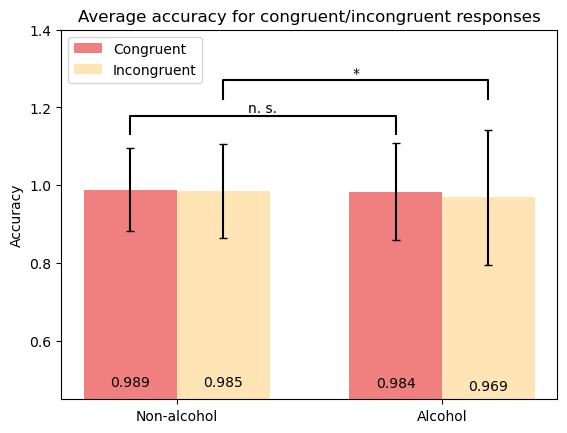

In [13]:
# Plot incongurent/congurent bar charts
x =  np.arange(len(labels))
width = 0.35
err_con = [errors[0], errors[2]]
err_incon = [errors[1], errors[3]]

heights = [con[0], incon[0], con[1], incon[1]]
bars = [-width/2, width/2, 1-width/2, 1+width/2]

p1 = plt.bar(x - width/2, con, color='lightcoral', label='Congruent', width=width, yerr=err_con, ecolor='k',capsize=3)
p2 = plt.bar(x + width/2, incon, color='moccasin', label='Incongruent', width=width, yerr=err_incon, ecolor='k', capsize=3)
plt.bar_label(p1, label_type='center')
plt.bar_label(p2, label_type='center')
plt.title('Average ' + var + ' for congruent/incongruent responses')
plt.xticks([i for i in range(len(labels))],labels)
if var == 'RT':
    plt.ylabel('Response time [ms]')
    plt.ylim(300,1100)
    annotate_p_values(0,2,pvalue_con,center=bars,height=heights,dh=.3)
    annotate_p_values(1,3,pvalue_incon,center=bars,height=heights,dh=.35)
if var == 'accuracy':
    plt.ylabel('Accuracy')
    plt.ylim(0.45,1.4)
    annotate_p_values(0,2,pvalue_con,center=bars,height=heights,dh=.15)
    annotate_p_values(1,3,pvalue_incon,center=bars,height=heights,dh=.25)
plt.legend()
plt.savefig('con-incon-' + var + '.png')